# Price Range Analysis

### Objective

This analysis explores the distribution of restaurant price ranges, calculates average ratings for each price range, and identifies the color associated with the highest-rated price range.

###  Dataset Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/Users/SaiGanesh/Downloads/Dataset .csv"
df = pd.read_csv(file_path)

df = df[['Price range', 'Aggregate rating', 'Rating color']].dropna()

### Most Common Price Range

In [3]:
common_price_range = df['Price range'].value_counts().idxmax()
print(f'Most common price range: {common_price_range}')

Most common price range: 1


### Distribution of Restaurants by Price Range

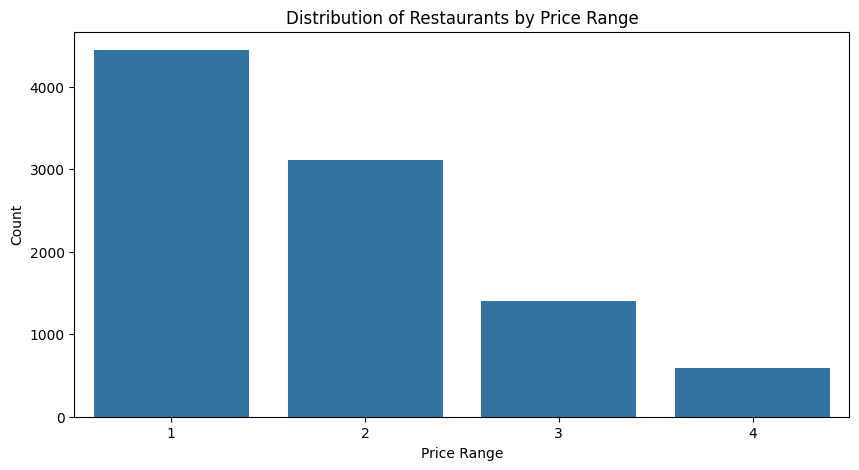

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Price range', data=df)
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Average Rating by Price Range

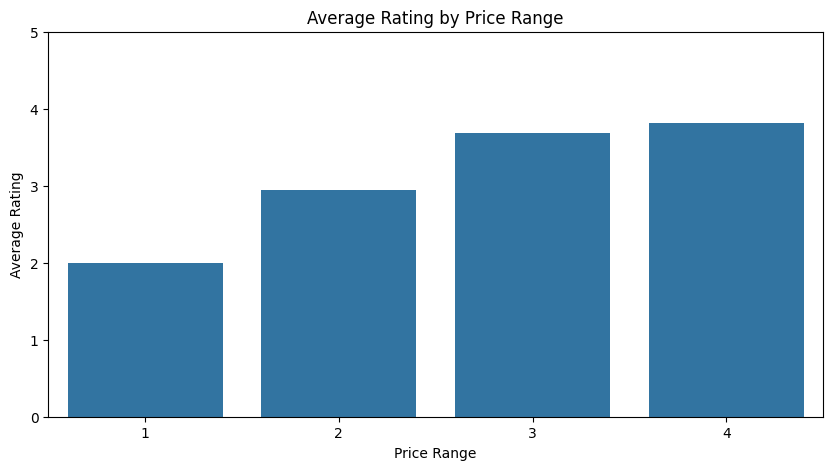

In [5]:
avg_ratings = df.groupby('Price range', as_index=False)['Aggregate rating'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x='Price range', y='Aggregate rating', data=avg_ratings)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()

### Rating Color Associated with Price Ranges

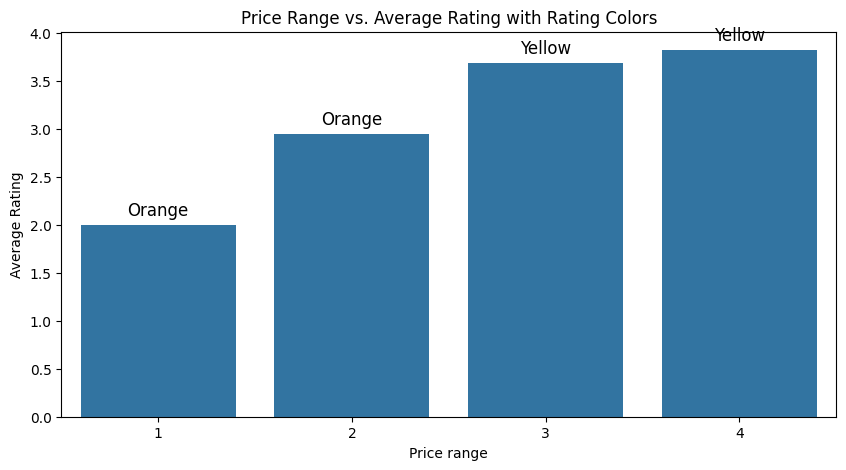

In [6]:
rating_color_mapping = df.groupby('Price range')['Rating color'].agg(lambda x: x.mode()[0]).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x='Price range', y='Aggregate rating', data=avg_ratings)
ax1.set_ylabel('Average Rating')
ax1.set_title('Price Range vs. Average Rating with Rating Colors')

for index, row in rating_color_mapping.iterrows():
    ax1.text(index, avg_ratings.iloc[index]['Aggregate rating'] + 0.1, row['Rating color'], ha='center', fontsize=12)

plt.show()

### Highest Rated Price Range Color

In [7]:
highest_rated_color = rating_color_mapping.iloc[avg_ratings['Aggregate rating'].idxmax()]['Rating color']
print(f'Color representing the highest average rating: {highest_rated_color}')

Color representing the highest average rating: Yellow
